# <img style="float: right;"  src="images/jp.png" width="200">

# Model2D Test

Test the [model2d module](http://localhost:8888/edit/Code/model2d.py)

This a non standard **Python** module. You can find it on the [Code Folder](http://localhost:8888/tree/Code)

The module is a collection of functions to work on simple $2D$ models.

## Module import

First we need to import the **model2d** module

In [1]:
# Import the module
import model2d as m2d
print('model2d version:',m2d.version)

model2d version: 1/7/2018


## Interactive plots

By defaults, plots are **non interactive**, you cannot zoom or pan on them

By running the following cell, you can make them **interactive**

In [2]:
# Activate interactive plots
m2d.interactivePlots()
%matplotlib notebook

Plots are now interactive
Remember to also set '%matplotlib notebook' in Jupyter


The following **code cell** makes plots **non interactive** again

In [ ]:
# Deactivate interactive plots
m2d.interactivePlots(False)
%matplotlib inline

# Two falange example

Model definition for a two falange example

In [3]:
baseModel = {}

#Body
passive = [[(0,1),(10,1),(10,-1),(0,-1),(0,1)]]   # One rectangular passive region
active = {}
active['joint']=(10,0)                            # Pivot 'joint' active point
active['node']=(5,-1)                             # 'node' active point for model line to ph1 node1
body = {}                                         # New 'body' solid
body['passive'] = passive                         # Add passive to solid
body['active'] = active                           # Add active to solid
baseModel['body'] = body                          # Add solid to model

# Phalanx 1
passive = [[(10,1),(15,1),(15,-1),(10,-1),(10,1)]] # One rectangular passive region
active = {}
active['joint1'] = (10,0)                          # Pivot 'joint1' connects to 'body'
active['joint2'] = (15,0)                          # Pivot 'joint2' connects to 'ph2'
active['node1']=(12.5,1)                           # 'node1' line to body node
active['node2']=(12.5,-1)                          # 'node2' line to ph2 node
ph1 = {}                                           # New 'ph1' solid
ph1['passive'] = passive                           # Add passive to solid
ph1['active'] = active                             # Add active to solid
ph1['angle'] = 0.0                                 # Add angle object
baseModel['ph1'] = ph1                             # Add solid to model

# Phalanx 2
passive = [[(15,1),(20,1),(20,-1),(15,-1),(15,1)]] # One rectangular passive region
active = {}
active['joint'] = (15,0)                           # Pivot 'joint' connects to 'ph1'
active['node']=(17.5,1)                            # 'node' line to ph1 node2
ph2 = {}                                           # New 'ph2' solid
ph2['passive'] = passive                           # Add passive to solid
ph2['active'] = active                             # Add active to solid
ph2['angle'] = 0.0                                 # Add angle object
baseModel['ph2'] = ph2                             # Add solid to model

print('baseModel created')

baseModel created


## Print model information

We can print information about a model, it contains, for each **solid** in the model:

* **passive** traces
* **active** points
* Other elements in the **solid**

As the model uses a **dictionary** to store the **solids**, they are not sorted in any way

In [4]:
# Show solid information
m2d.printModel(baseModel)

Solid "body" information -----------------------------

Solid has 1 passive traces
  Trace 0 : [(0, 1), (10, 1), (10, -1), (0, -1), (0, 1)]

Solid has 2 active points
  joint  :  (10, 0)
  node  :  (5, -1)

Solid has no other elements

Solid "ph1" information -----------------------------

Solid has 1 passive traces
  Trace 0 : [(10, 1), (15, 1), (15, -1), (10, -1), (10, 1)]

Solid has 4 active points
  joint1  :  (10, 0)
  joint2  :  (15, 0)
  node1  :  (12.5, 1)
  node2  :  (12.5, -1)

Other elements in solid:
  angle  :  0.0

Solid "ph2" information -----------------------------

Solid has 1 passive traces
  Trace 0 : [(15, 1), (20, 1), (20, -1), (15, -1), (15, 1)]

Solid has 2 active points
  joint  :  (15, 0)
  node  :  (17.5, 1)

Other elements in solid:
  angle  :  0.0



## Model lines

It is possible to define lines on a model that connect different points in the **solids**

The following example is a **line generator** that adds two lines:
* one connects one active point in **body** with one active point in **ph1**
* other connects one active point in **ph1** with one active point in **ph2**

You are not restricted to connect lines to **active points**

In [5]:
# Lingen example

def generateLingen(model):
    lingen = []
    ba   = model['body']['active'][ 'node']
    ph1a = model[ 'ph1']['active']['node1']
    ph1b = model[ 'ph1']['active']['node2']
    ph2a = model[ 'ph2']['active'][ 'node']
    lingen.append((ba,ph1a))
    lingen.append((ph1b,ph2a))
    return lingen

print('lingen generator created')

lingen generator created


## Model rendering

The model rendering generates a image on a model that contains:
* Traces of the model solids
* Active points in the solids
* Additional model lines

The rendering can be configured by settin the active point marker size and the units for the axes

<IPython.core.display.Javascript object>


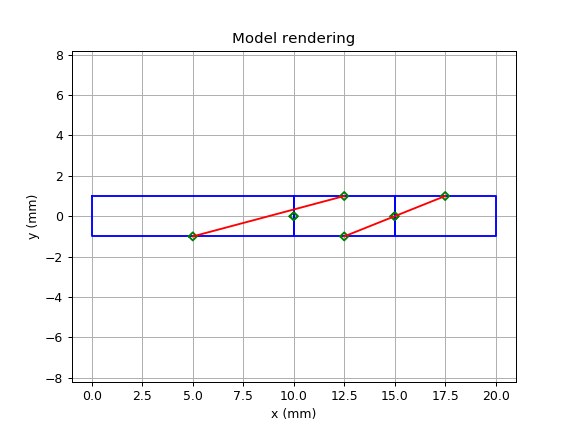

In [6]:
# Rendering configuration
m2d.setMarkerSize(0.2)
m2d.setLenUnit('mm')

# Lingen generation
lingen = generateLingen(baseModel)

# Model rendering
m2d.renderModel(baseModel,lingen)

## Model transformation

The elements in a solid, both **passive** traces and **active** points, always keep the same distances to each other. But solids can be rotated respect to the reference plane or respect to other solids.

The basic transformations for a solid are:

* Relative movement in $X$ and $Y$ axes
* Rotation arround the origin

First we define a function that is able to change the two rotation angles in the joints

In [7]:
def modelTransform(a1,a2):
    model = {}

    # Leave body as is
    model['body'] = baseModel['body']

    # Rotate ph1
    ph1 = baseModel['ph1']                                # Get ph1 solid
    origin = ph1['active']['joint1']                      # Get origin as 'joint1' active point
    ph1 = m2d.moveSolid(ph1,(-origin[0],-origin[1]))      # Traslate 'joint1' to origin 
    ph1 = m2d.rotateSolid(ph1,-a1)                        # Rotate a1
    destination = baseModel['body']['active']['joint']    # Set destination of ph1 on body solid 'joint'
    ph1 = m2d.moveSolid(ph1,destination)                  # Move to destination
    ph1['angle'] = a1                                     # New angle parameter
    model['ph1']  = ph1                                   # New ph1 element in model

    # Rotate ph2
    ph2 = baseModel['ph2']                                # Get ph2 solid
    origin = ph2['active']['joint']                       # Get origin as 'joint' active point
    ph2 = m2d.moveSolid(ph2,(-origin[0],-origin[1]))      # Traslate 'joint' to origin 
    ph2 = m2d.rotateSolid(ph2,-a1-a2)                     # Rotate a1 + a2
    destination = ph1['active']['joint2']                 # Set destination of ph1 on ph1 solid 'joint2'
    ph2 = m2d.moveSolid(ph2,destination)                  # Move to destination
    ph2['angle'] = a2                                     # New angle parameter
    model['ph2']  = ph2                                   # New ph2 element in model
    return model

print('modelTransform generated')

modelTransform generated


Then, we use this function to obtain a transformation for two particular angles

<IPython.core.display.Javascript object>


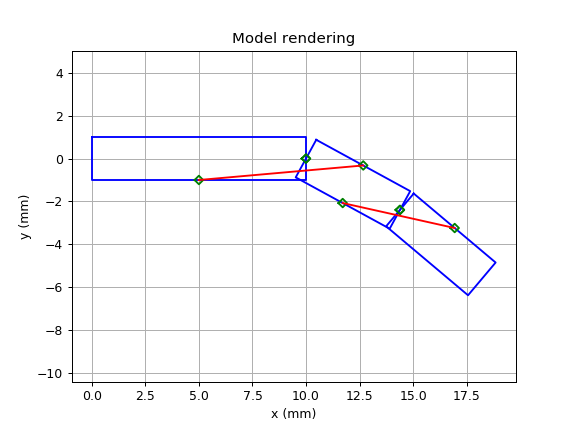

In [8]:
# Set two particular angles (in rad)
a1 = 0.5
a2 = 0.2

# Apply the transformation
model = modelTransform(a1,a2)  

# Render new model
lingen = generateLingen(model)
m2d.renderModel(model,lingen)

We can also render without the **red lines**

<IPython.core.display.Javascript object>


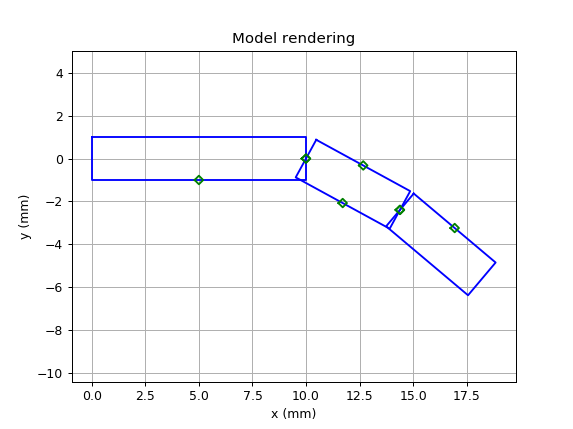

In [9]:
# Render new model
m2d.renderModel(model)

Or render without the **active points**

<IPython.core.display.Javascript object>


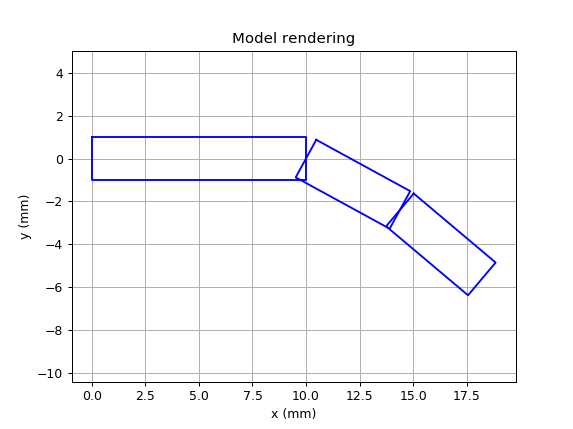

In [10]:
# Render new model
m2d.renderModel(model,active=False)

## Model sequence

We can draw in one image the sequence of several models

<IPython.core.display.Javascript object>


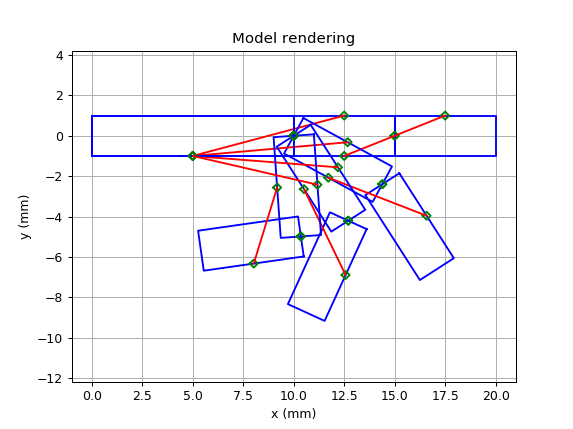

<IPython.core.display.Javascript object>


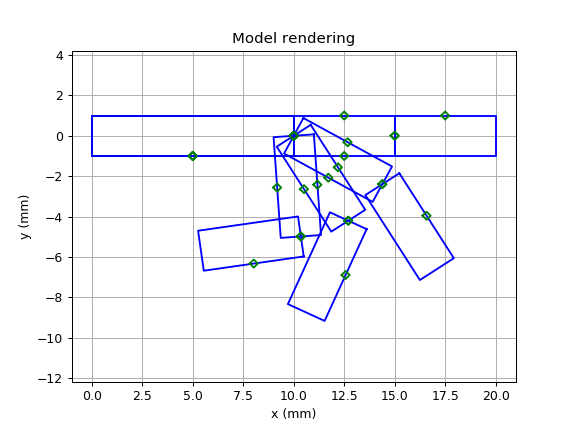

<IPython.core.display.Javascript object>


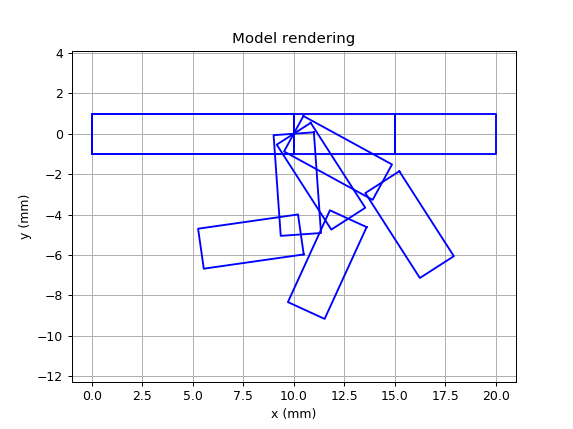

In [11]:
# Import the required numpy module
import numpy as np

# Generate a sequence of models and lines
# Both angles are equal
# Values of 0.0, 0.5, 1.0 and 1.5
models = []
lines  = []
for a in np.arange(0.0,1.6,0.5):
    model = modelTransform(a,a)
    lingen = generateLingen(model)
    models.append(model)
    lines.append(lingen)
    
# Render the sequence    
m2d.renderSequence(models,lines)  

# Render the sequence without lines    
m2d.renderSequence(models) 

# Render the sequence without lines or active points    
m2d.renderSequence(models,active=False) 